## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
DROPOUT_EXP= [0.1, 0.25, 0.5, 0.9]

In [13]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for dropout_ratio in DROPOUT_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout Ratio = %.6f " % (dropout_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drp-ratio-%s" % (str(dropout_ratio))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout Ratio = 0.100000 


W0719 22:11:42.861801 140710308652864 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

W0719 22:11:43.272214 140710308652864 deprecation.py:323] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.0037 - acc: 0.2575 - val_loss: 1.7960 - val_acc: 0.3440
Epoch 2/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.8098 - acc: 0.3460 - val_loss: 1.7043 - val_acc: 0.3872
Epoch 3/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.7431 - acc: 0.3740 - val_loss: 1.6391 - val_acc: 0.4189
Epoch 4/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6832 - acc: 0.3942 - val_loss: 1.6008 - val_acc: 0.4240
Epoch 5/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.6449 - acc: 0.4094 - val_loss: 1.5642 - val_acc: 0.4460
Epoch 6/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6186 - acc: 0.4198 - val_loss: 1.5415 - val_acc: 0.4432
Epoch 7/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.5821 - acc: 0.4332 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.1507 - acc: 0.1918 - val_loss: 1.9330 - val_acc: 0.3070
Epoch 2/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.9424 - acc: 0.2858 - val_loss: 1.8265 - val_acc: 0.3457
Epoch 3/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.8843 - acc: 0.3118 - val_loss: 1.7611 - val_acc: 0.3629
Epoch 4/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8417 - acc: 0.3279 - val_loss: 1.7601 - val_acc: 0.3774
Epoch 5/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8153 - acc: 0.3429 - val_loss: 1.7321 - val_acc: 0.3729
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7947 - acc: 0.3475 - val_loss: 1.6865 - val_acc: 0.3969
Epoch 7/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.7733 - acc: 0.3569 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.3047 - acc: 0.1179 - val_loss: 2.2063 - val_acc: 0.1685
Epoch 2/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.2264 - acc: 0.1345 - val_loss: 2.1640 - val_acc: 0.1731
Epoch 3/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.1846 - acc: 0.1478 - val_loss: 2.1507 - val_acc: 0.1767
Epoch 4/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.1591 - acc: 0.1586 - val_loss: 2.0977 - val_acc: 0.1951
Epoch 5/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.1376 - acc: 0.1627 - val_loss: 2.1090 - val_acc: 0.1904
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.1295 - acc: 0.1699 - val_loss: 2.0912 - val_acc: 0.2017
Epoch 7/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.1225 - acc: 0.1745 - val_loss: 2.

W0719 22:42:59.478390 140710308652864 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0719 22:42:59.517879 140710308652864 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0719 22:42:59.647621 140710308652864 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Experiment with Dropout Ratio = 0.900000 


W0719 22:42:59.683291 140710308652864 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 7s 149us/step - loss: 2.3027 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.3027 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.3031 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.3027 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000


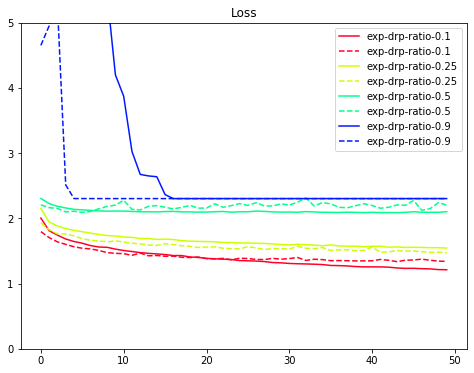

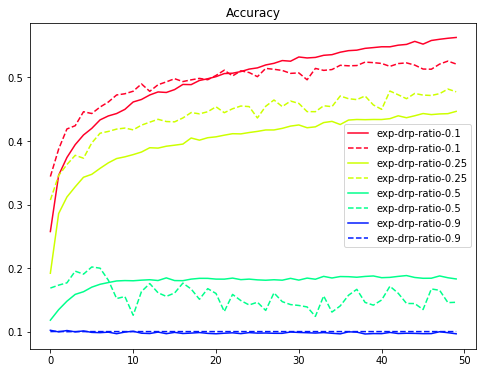

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()